In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import joblib

In [2]:
# Step 1: Load the data
file_path = 'biometria.xlsx'
data = pd.read_excel(file_path)

In [3]:
# Dropping the useless columns
data = data.drop(columns=['Index', 'data'])

In [4]:
# Step 2: Select features and target
X = data.drop(columns=['peso'])
y = data['peso']


In [5]:
# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Step 4: Initialize the Extra Trees Regressor
#etr = RandomForestClassifier(random_state=42)
etr = ExtraTreesRegressor(random_state=42)

In [7]:
# Step 5: Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [8]:
# Step 6: Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=etr, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2')
grid_search.fit(X_train, y_train)

C:\Users\crist\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
295 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\crist\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\crist\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='r2')

In [9]:
# Step 7: Best parameters and model evaluation
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [10]:
# Predict and evaluate the model
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

R² Score: 0.9861294892988397


In [11]:
# Step 8: Plot learning curves
def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

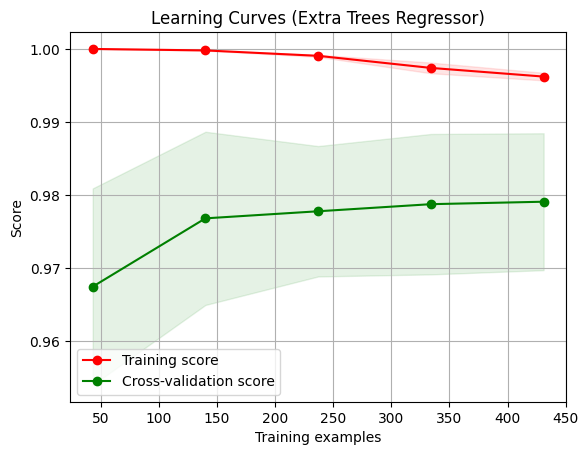

In [12]:
plot_learning_curve(best_model, "Learning Curves (Extra Trees Regressor)", X_train, y_train, cv=5, n_jobs=-1)
plt.show()

In [13]:
# Step 9: Save the model with precise name
model_filename = 'extra_trees_regressor_model_bio6.joblib'
joblib.dump(best_model, model_filename)
print(f"\nModel saved to {model_filename}")


Model saved to extra_trees_regressor_model_bio6.joblib


In [14]:
# Step 10: Load the model
loaded_model = joblib.load(model_filename)
print("\nModel loaded:{model_filename}")


Model loaded:{model_filename}


In [15]:
## Vizualiasing some some predictions
print("\nSample Predictions:")
for i in range(10):
    print(f"Actual: {y_test.iloc[i]}, Predicted: {y_pred[i]}")


Sample Predictions:
Actual: 330.88, Predicted: 330.7104198234124
Actual: 136.07, Predicted: 140.48549292259983
Actual: 318.3, Predicted: 299.16200075914765
Actual: 280.1, Predicted: 281.9643002739138
Actual: 207.65, Predicted: 205.3195904459286
Actual: 44.78, Predicted: 44.605387718403364
Actual: 412.74, Predicted: 416.88320916519586
Actual: 93.2, Predicted: 89.9097099050893
Actual: 403.98, Predicted: 332.29663880327826
Actual: 478.31, Predicted: 464.91028636627277
